# sklearn Regression - 수치예측

# 실습용 데이터 설정

In [1]:
import pandas as pd
DF= pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
DF.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


## 1) 분석 변수 선택

In [3]:
DF1 = DF[['expenses', 'age', 'bmi', 'children']]
DF1.head(3)

,expenses,age,bmi,children
0,16884.9240,19,27.90,0
1,1725.5523,18,33.77,1
2,4449.4620,28,33.00,3


In [4]:
from sklearn.model_selection import train_test_split

X = DF1[['age', 'bmi', 'children']]
y = DF1['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape )

Train Data :  (936, 3) (936,)
Test Data :  (402, 3) (402,)


# 1, Multivariate Regression

In [6]:
%%time

from sklearn.linear_model import LinearRegression

MR = LinearRegression(normalize = True, n_jobs = -1)
MR.fit(X_train, y_train)

CPU times: user 5.54 ms, sys: 1.12 ms, total: 6.66 ms
Wall time: 33.4 ms


In [7]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, MR.predict(X_test))

114300134.03204554

# 2, Ridge Regression

In [18]:
%%time
from sklearn.linear_model import Ridge

RG = Ridge(normalize = True, alpha = 0.3, solver = 'cholesky')

RG.fit(X_train, y_train)

CPU times: user 2.99 ms, sys: 0 ns, total: 2.99 ms
Wall time: 3.02 ms


In [19]:
mean_squared_error(y_test, RG.predict(X_test))

113578068.78448391

# 3, Lasso Regression

In [31]:
%%time

from sklearn.linear_model import Lasso

LS = Lasso(normalize = True,alpha = 0.2)
LS.fit(X_train, y_train)

CPU times: user 2.85 ms, sys: 0 ns, total: 2.85 ms
Wall time: 3.36 ms


In [32]:
mean_squared_error(y_test, LS.predict(X_test))

114279766.62560357

# 4, ElasticNet Regression

In [12]:
%%time

from sklearn.linear_model import ElasticNet

EN = ElasticNet(normalize = True, alpha = 0.001, l1_ratio = 0.7) # l1_ratio = l1를 0.7로 적용하겠다는 뜻
EN.fit(X_train, y_train)

CPU times: user 2.48 ms, sys: 0 ns, total: 2.48 ms
Wall time: 2.97 ms


In [13]:
mean_squared_error(y_test, EN.predict(X_test))

113571195.19021483

# 5, Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth = 5, criterion = 'mse') # 오차측정을 gini계수X, MSE O
DTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [34]:
mean_squared_error(y_test, DTR.predict(X_test))

140104079.12184906

In [35]:
DTR.feature_importances_

array([0.45044017, 0.48302537, 0.06653445])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


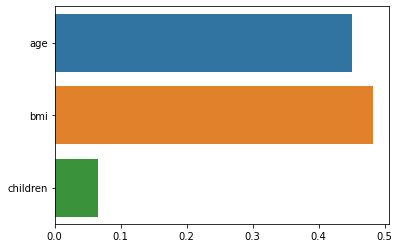

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(DTR.feature_importances_, ['age', 'bmi', 'children'])
plt.show()

# 6, Random Forest Regressor

In [39]:
%%time

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 2000, max_features = 3, max_depth =1, criterion = 'mse', n_jobs= -1, random_state=2045)

RFR.fit(X_train, y_train)

CPU times: user 3.69 s, sys: 458 ms, total: 4.15 s
Wall time: 3.48 s


In [40]:
mean_squared_error(y_test, RFR.predict(X_test))

114282870.90114409

In [42]:
RFR.feature_importances_

array([0.794, 0.206, 0.   ])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


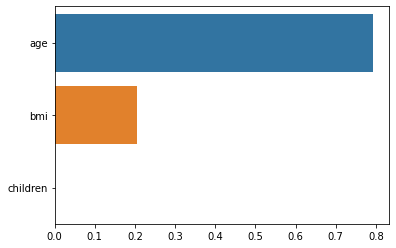

In [43]:
sns.barplot(RFR.feature_importances_, ['age','bmi','children'])
plt.show()

# 7, Gradien Boosting Machine(GBM) Classifier

In [44]:
%%time

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(loss = 'ls', n_estimators = 9000, learning_rate = 0.0001, criterion = 'mse', max_features=3, max_depth=1)
GBR.fit(X_train, y_train)

CPU times: user 4.13 s, sys: 2.71 ms, total: 4.14 s
Wall time: 4.15 s


In [45]:
mean_squared_error(y_test, GBR.predict(X_test))

118523943.40353534

In [46]:
GBR.feature_importances_

array([0.68958147, 0.31041853, 0.        ])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


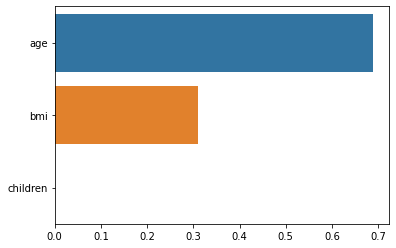

In [47]:
sns.barplot(GBR.feature_importances_, ['age','bmi','children'])
plt.show()

# 8, Adaptive Boosting Regressor

In [48]:
%%time

from sklearn.ensemble import AdaBoostRegressor

ABR = AdaBoostRegressor(loss = 'square', n_estimators = 500, learning_rate = 0.0001, random_state=2045)
ABR.fit(X_train, y_train)

CPU times: user 944 ms, sys: 778 µs, total: 945 ms
Wall time: 950 ms


In [49]:
mean_squared_error(y_test, ABR.predict(X_test))

118481893.52922821

In [51]:
ABR.feature_importances_

array([0.57474029, 0.3843226 , 0.04093711])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


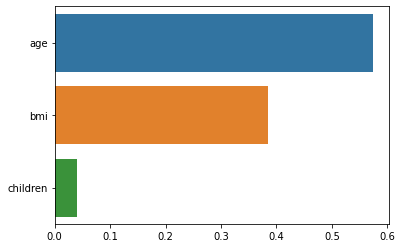

In [52]:
sns.barplot(ABR.feature_importances_, ['age','bmi','children'])
plt.show()

# 9, eXtra Gradient Boost(XGBoost) Classifier

In [54]:
%%time

from xgboost import XGBRegressor

XGB = XGBRegressor(booster='gblinear', n_estimators=100, learning_rate=0.4, reg_lambda=3.0, n_jobs= -1)
XGB.fit(X_train, y_train)

[02:17:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 44.4 ms, sys: 14.2 ms, total: 58.6 ms
Wall time: 136 ms


In [55]:
mean_squared_error(y_test, XGB.predict(X_test))

112752485.09218878

# 10, LightGBM Regressior

In [56]:
%%time

from lightgbm import LGBMRegressor

LGB =LGBMRegressor(llinear_tree = True, boosting_type='gbdt', objective ='regression',
                   n_estimators = 500, learning_rate=0.001, max_depth=2, n_jobs=-1)
LGB.fit(X_train, y_train)

CPU times: user 112 ms, sys: 9.01 ms, total: 121 ms
Wall time: 91.7 ms


In [57]:
mean_squared_error(y_test, LGB.predict(X_test))

119555446.90396042

In [58]:
LGB.feature_importances_

array([909, 591,   0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


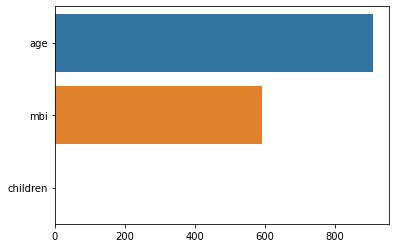

In [59]:
sns.barplot(LGB.feature_importances_, ['age','mbi','children'])
plt.show()